### Importing libraries and dataset

In [255]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [256]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [257]:
pip install Opencv-python

Note: you may need to restart the kernel to use updated packages.


In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
import cv2
import os

### Reading train image dataset , and viewing images and their arrays

In [262]:
IMG_DIR = 'train'
SIZE = (100,100)

In [263]:
#function to read images from specifed folder
def read_images(IMG_DIR, SIZE):
    x = []
    y = []

    for folder_name in os.listdir(IMG_DIR):   
        folder_path = f'{IMG_DIR}/{folder_name}'
        for img_file in os.listdir(folder_path):
            img_file = f'{folder_path}/{img_file}'
            img_array = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
            img_array = cv2.resize(img_array, SIZE, interpolation = cv2.INTER_AREA)
            x.append(img_array)
            y.append(folder_name)

    x = np.array(x)
    y = np.array(y)
    
    return (x, y)

In [264]:
X, Y = read_images(IMG_DIR, SIZE)
print(X.shape, Y.shape)

(148, 100, 100) (148,)


In [265]:
X[0].shape, Y[0].shape

((100, 100), ())

In [205]:
X[1], Y[1]

(array([[ 29,  28,  49, ..., 127, 121, 100],
        [ 29,  29,  42, ..., 128, 120,  98],
        [ 29,  30,  37, ..., 127, 118,  95],
        ...,
        [ 33,  41,  40, ...,  33,  33,  30],
        [ 33,  41,  41, ...,  33,  33,  30],
        [ 32,  41,  41, ...,  32,  33,  30]], dtype=uint8),
 'NORMAL')

Text(0.5, 1.0, 'PNEUMONIA')

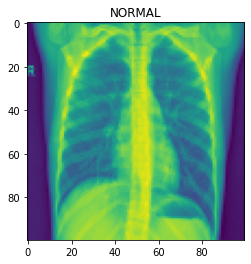

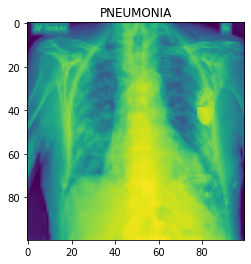

In [206]:
plt.figure(figsize=(4,4))
plt.imshow(X[1])
plt.title(Y[1])

plt.figure(figsize=(4,4))
plt.imshow(X[100])
plt.title(Y[100])

### Setting up model specifics

In [207]:
img_row_size = 100
img_col_size = 100

In [208]:
batch_size = 20
num_classes = 10
epochs = 30

### Performing reshaping of X variable, label encoding of Y variable and then normalising X variable by dividing by 255

In [209]:
X= X.reshape(X.shape[0], img_row_size, img_col_size, 1)

In [210]:
X.shape

(148, 100, 100, 1)

In [211]:
Y.shape

(148,)

In [212]:
le=LabelEncoder()
Y=le.fit_transform(Y)

In [213]:
Y.dtype

dtype('int64')

In [214]:
Y_train = keras.utils.to_categorical(Y, num_classes)

In [215]:
Y_train.shape

(148, 2)

In [216]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [217]:
X = X.astype('float32')
X_train = X/255

In [218]:
X_train[2]

array([[[0.14117648],
        [0.14117648],
        [0.13333334],
        ...,
        [0.11764706],
        [0.12156863],
        [0.11372549]],

       [[0.14117648],
        [0.14117648],
        [0.13333334],
        ...,
        [0.11372549],
        [0.11372549],
        [0.10980392]],

       [[0.13333334],
        [0.13725491],
        [0.13333334],
        ...,
        [0.10588235],
        [0.10980392],
        [0.10588235]],

       ...,

       [[0.10980392],
        [0.10980392],
        [0.10588235],
        ...,
        [0.12941177],
        [0.13333334],
        [0.12941177]],

       [[0.10980392],
        [0.10980392],
        [0.10588235],
        ...,
        [0.12941177],
        [0.13725491],
        [0.12941177]],

       [[0.10588235],
        [0.10980392],
        [0.10588235],
        ...,
        [0.13333334],
        [0.13333334],
        [0.12941177]]], dtype=float32)

### Reading test images folder, viewing images within and their corresponding arrays

In [219]:
IMG_DIR1 = 'test'
SIZE = (100,100)

In [220]:
#function to read images from specifed folder
def read_images(IMG_DIR1, SIZE):
    x = []
    y = []

    for folder_name in os.listdir(IMG_DIR1):   
        folder_path = f'{IMG_DIR1}/{folder_name}'
        for img_file in os.listdir(folder_path):
            img_file = f'{folder_path}/{img_file}'
            img_array = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
            img_array = cv2.resize(img_array, SIZE, interpolation = cv2.INTER_AREA)
            x.append(img_array)
            y.append(folder_name)

    x = np.array(x)
    y = np.array(y)
    
    return (x, y)

In [221]:
X, Y = read_images(IMG_DIR1, SIZE)
print(X.shape, Y.shape)

(40, 100, 100) (40,)


In [222]:
X[0].shape, Y[0].shape

((100, 100), ())

In [223]:
X[1], Y[1]

(array([[0, 0, 0, ..., 9, 0, 0],
        [0, 0, 0, ..., 8, 0, 0],
        [0, 0, 0, ..., 7, 0, 0],
        ...,
        [0, 0, 8, ..., 0, 0, 0],
        [0, 0, 8, ..., 0, 0, 0],
        [0, 0, 5, ..., 0, 0, 0]], dtype=uint8),
 'NORMAL')

Text(0.5, 1.0, 'PNEUMONIA')

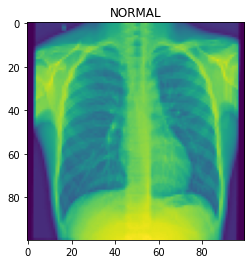

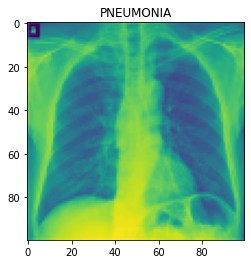

In [224]:
plt.figure(figsize=(4,4))
plt.imshow(X[1])
plt.title(Y[1])

plt.figure(figsize=(4,4))
plt.imshow(X[20])
plt.title(Y[20])

In [225]:
img_row_size = 100
img_col_size = 100

### Performing reshaping of X variable, label encoding of Y variable and then normalising X variable by dividing by 255

In [227]:
X_test= X.reshape(X.shape[0], img_row_size, img_col_size, 1)

In [228]:
X_test.shape

(40, 100, 100, 1)

In [229]:
Y.shape

(40,)

In [230]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)

In [231]:
Y.dtype

dtype('int64')

In [232]:
Y_test = keras.utils.to_categorical(Y, num_classes)

In [233]:
Y_test.shape

(40, 2)

In [234]:
Y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [235]:
X_test = X_test.astype('float32')
X_test = X/255

In [236]:
X_test

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.03529412,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.03137255,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.02745098,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.03137255, ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [237]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((148, 100, 100, 1), (40, 100, 100), (148, 2), (40, 2))

In [238]:
input_shape = (img_row_size, img_col_size, 1)

### Building model

In [239]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import MaxPooling2D, Conv2D
from keras.layers import ReLU,PReLU,ELU,LeakyReLU

In [240]:
model = Sequential()

In [241]:
model.add(Conv2D(32, input_shape=input_shape, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64, input_shape=input_shape, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 conv2d_10 (Conv2D)          (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 147456)            0         
                                                                 
 dense_8 (Dense)             (None, 128)               18874496  
                                                                 
 dense_9 (Dense)             (None, 2)                 258       
                                                      

In [242]:
model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [243]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [244]:
H=model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, Y_test), callbacks=early_stopping, verbose=True)

Epoch 1/30
8/8 [==============================] - 6s 654ms/step - loss: 1.3923 - accuracy: 0.6149 - val_loss: 0.4680 - val_accuracy: 0.6500
Epoch 2/30
8/8 [==============================] - 5s 628ms/step - loss: 0.4913 - accuracy: 0.8649 - val_loss: 0.1921 - val_accuracy: 0.9750
Epoch 3/30
8/8 [==============================] - 5s 630ms/step - loss: 0.2407 - accuracy: 0.9257 - val_loss: 0.0454 - val_accuracy: 0.9750
Epoch 4/30
8/8 [==============================] - 5s 627ms/step - loss: 0.1848 - accuracy: 0.9189 - val_loss: 0.0693 - val_accuracy: 0.9750
Epoch 5/30
8/8 [==============================] - 5s 623ms/step - loss: 0.2627 - accuracy: 0.8919 - val_loss: 0.0978 - val_accuracy: 1.0000
Epoch 6/30
8/8 [==============================] - 5s 654ms/step - loss: 0.1730 - accuracy: 0.9527 - val_loss: 0.0658 - val_accuracy: 0.9750
Epoch 7/30
8/8 [==============================] - 5s 642ms/step - loss: 0.0828 - accuracy: 0.9730 - val_loss: 0.0494 - val_accuracy: 0.9750
Epoch 8/30
8/8 [====

In [245]:
H.history.keys

<function dict.keys>

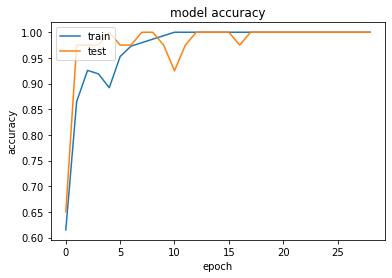

In [246]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

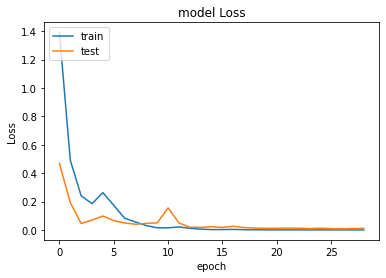

In [247]:
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [248]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 79ms/step - loss: 0.0108 - accuracy: 1.0000


[0.010836342349648476, 1.0]